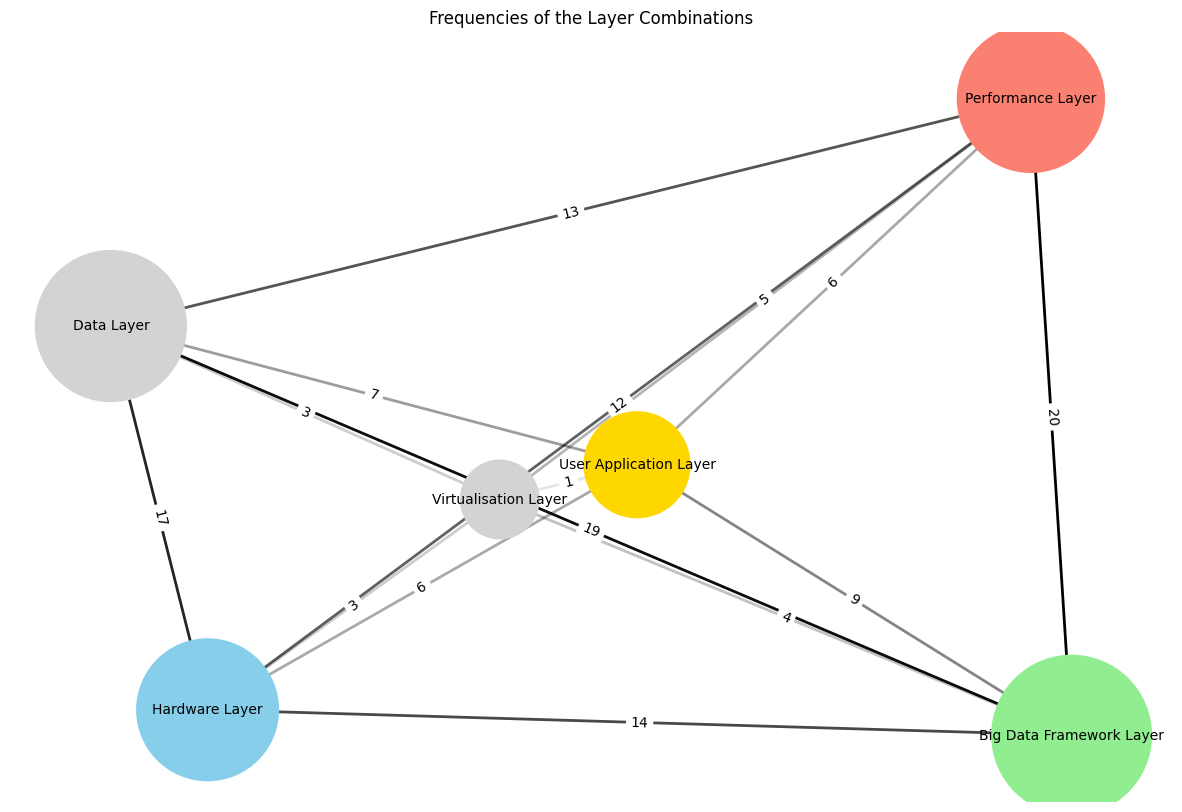

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np 

from data.database import two_tupel_combinations

# Initialize an undirected graph
G_combined = nx.Graph()

# Add each edge combination to G_combined with the corresponding frequency
for (layer1, layer2), frequency in two_tupel_combinations:
    if G_combined.has_edge(layer1, layer2):
        G_combined[layer1][layer2]['weight'] += frequency
    else:
        G_combined.add_edge(layer1, layer2, weight=frequency)

# Color coding for the layers
layer_colors = {
    'Hardware Layer': 'skyblue',
    'Big Data Framework Layer': 'lightgreen',
    'Performance Layer': 'salmon',
    'User Application Layer': 'gold',
    'JVM Layer': 'violet',
    'Data Layer': 'lightgrey',
    'Cloud Layer': 'orange'
}
colors_agg = [layer_colors.get(node, 'lightgrey') for node in G_combined.nodes()]

# Calculate node frequency
node_frequency_combined = {node: 0 for node in G_combined.nodes()}
for (layer1, layer2), frequency in daten:
    node_frequency_combined[layer1] += frequency
    node_frequency_combined[layer2] += frequency

# Adjust node sizes
node_sizes_combined = [node_frequency_combined[node] * 200 for node in G_combined.nodes()]

# Normalized weights for transparency
weights = [d['weight'] for (u, v, d) in G_combined.edges(data=True)]
min_weight = min(weights)
max_weight = max(weights)
normalized_weights = [1 + 9 * (weight - min_weight) / (max_weight - min_weight) for weight in weights]
alpha_values_corrected = [0.1 + 0.9 * (weight - min(normalized_weights)) / (max(normalized_weights) - min(normalized_weights)) for weight in normalized_weights]

# Draw graph with the Kamada-Kawai layout
plt.figure(figsize=(15, 10))
pos_combined = nx.kamada_kawai_layout(G_combined)

nx.draw_networkx_nodes(G_combined, pos_combined, node_size=node_sizes_combined, node_color=colors_agg)

# Draw edges with adjusted alpha values
for (u, v), alpha in zip(G_combined.edges(), alpha_values_corrected):
    nx.draw_networkx_edges(G_combined, pos_combined, edgelist=[(u, v)], alpha=alpha, width=2)

# Adjust node labels
node_labels = {node: node for node in G_combined.nodes()}
nx.draw_networkx_labels(G_combined, pos_combined, labels=node_labels, font_size=10)

# Add edge labels
edge_labels_combined = nx.get_edge_attributes(G_combined, 'weight')
nx.draw_networkx_edge_labels(G_combined, pos_combined, edge_labels=edge_labels_combined)

plt.title('Frequencies of the Layer Combinations')
plt.axis('off')
plt.show()
